### Loading libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 


### Decription of the fields of dataset

In [3]:
description = pd.read_excel("../final_project/sources/LCDataDictionary.xlsx")
description.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


### Accepted loans dataset (151 columns, 2260701 rows)

In [133]:
accepted = pd.read_csv("../final_project/sources/accepted_2007_to_2018Q4.csv", low_memory=False)

In [134]:
pd.set_option('display.max_columns', None)

In [135]:
accepted.columns.to_list()

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 '

In [6]:
accepted.shape

(2260701, 151)

In [131]:
accepted.dtypes

id                             object
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_h

In [8]:
accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
accepted.isna().sum()

id                                                  0
member_id                                     2260701
loan_amnt                                          33
funded_amnt                                        33
funded_amnt_inv                                    33
term                                               33
int_rate                                           33
installment                                        33
grade                                              33
sub_grade                                          33
emp_title                                      167002
emp_length                                     146940
home_ownership                                     33
annual_inc                                         37
verification_status                                33
issue_d                                            33
loan_status                                        33
pymnt_plan                                         33
url                         

### Dropping columns that have more than 50% of missing values 
Dropped a total of  44 columns as they were not providing enough information. Data was missing at various points so there was no good way to fill it in, while dropping rows with NA values would have significantly reduced amount of data available


In [10]:
drop_columns = [i for i in accepted.columns if accepted[i].isna().sum() > 1100000]

In [11]:
len(drop_columns)

44

In [12]:
accepted.drop(drop_columns, axis = 1, inplace = True)

In [13]:
accepted.isna().sum()

id                                 0
loan_amnt                         33
funded_amnt                       33
funded_amnt_inv                   33
term                              33
int_rate                          33
installment                       33
grade                             33
sub_grade                         33
emp_title                     167002
emp_length                    146940
home_ownership                    33
annual_inc                        37
verification_status               33
issue_d                           33
loan_status                       33
pymnt_plan                        33
url                               33
purpose                           33
title                          23358
zip_code                          34
addr_state                        33
dti                             1744
delinq_2yrs                       62
earliest_cr_line                  62
fico_range_low                    33
fico_range_high                   33
i

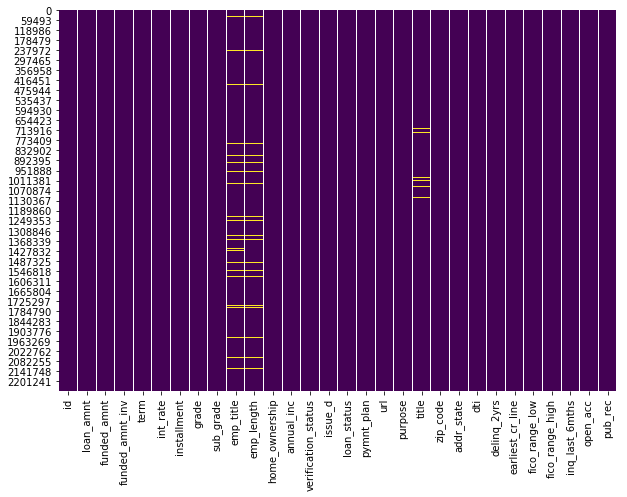

In [14]:
plt.figure(figsize=(10,7))
sns.heatmap(accepted.iloc[:, :30].isnull(), cbar = False, cmap = "viridis")

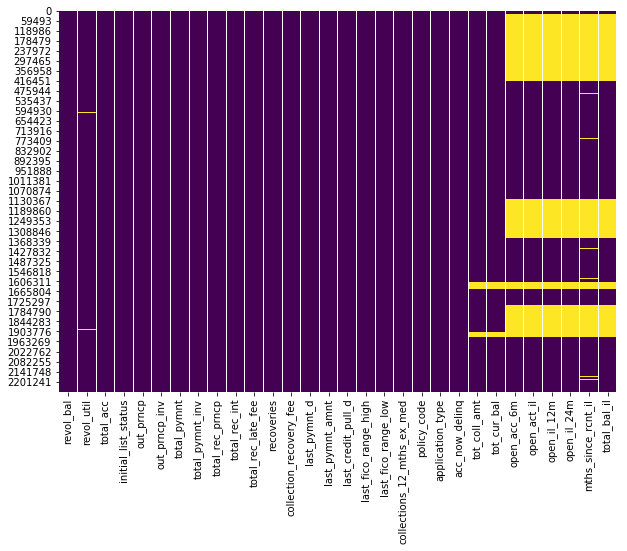

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(accepted.iloc[:, 30:60].isnull(), cbar = False, cmap = "viridis")

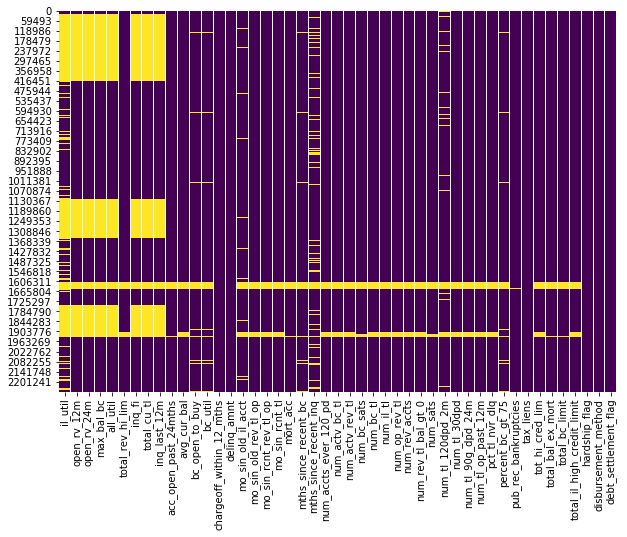

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(accepted.iloc[:, 60:].isnull(), cbar = False, cmap = "viridis")

#### Dropping the 33 rows where all entries are NaN

In [17]:
accepted[accepted["loan_amnt"].isnull() == True]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
421095,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,Total amount funded in policy code 2: 1944088810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528961,Total amount funded in policy code 1: 1741781700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
528962,Total amount funded in policy code 2: 564202131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651664,Total amount funded in policy code 1: 1791201400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
651665,Total amount funded in policy code 2: 651669342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749520,Total amount funded in policy code 1: 1443412975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
749521,Total amount funded in policy code 2: 511988838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877716,Total amount funded in policy code 1: 2063142975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877717,Total amount funded in policy code 2: 823319310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
accepted[accepted["loan_amnt"].isnull() == True].index

Int64Index([ 421095,  421096,  528961,  528962,  651664,  651665,  749520,
             749521,  877716,  877717,  983169,  983170, 1117058, 1117059,
            1352689, 1352690, 1481103, 1481104, 1611877, 1611878, 1651665,
            1654415, 1654416, 1751196, 1751197, 1939379, 1939380, 2038501,
            2038502, 2157151, 2157152, 2260699, 2260700],
           dtype='int64')

In [19]:
accepted.drop(accepted[accepted["loan_amnt"].isnull() == True].index, inplace = True)

In [20]:
accepted.isna().sum()

id                                 0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                     166969
emp_length                    146907
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                          23325
zip_code                           1
addr_state                         0
dti                             1711
delinq_2yrs                       29
earliest_cr_line                  29
fico_range_low                     0
fico_range_high                    0
i

#### Filling missing values in emp_title collumn (The job title supplied by the Borrower when applying for the loan.) with "other"

In [105]:
accepted["emp_title"] = accepted["emp_title"].fillna("other")

In [106]:
accepted_2018 = accepted[accepted["issue_d"].str.contains("2018")].sort_values(["issue_d", "id"]).reset_index()

In [107]:
accepted_2018.shape

(495242, 108)

In [108]:
accepted_2018.isna().sum()

80824

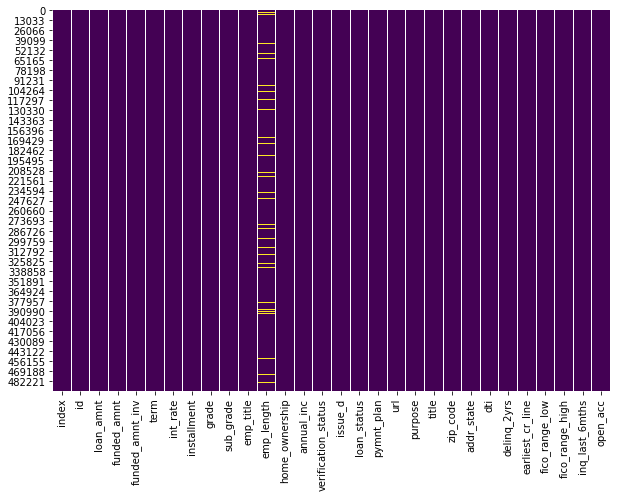

In [109]:
plt.figure(figsize=(10,7))
sns.heatmap(accepted_2018.iloc[:, :30].isnull(), cbar = False, cmap = "viridis")

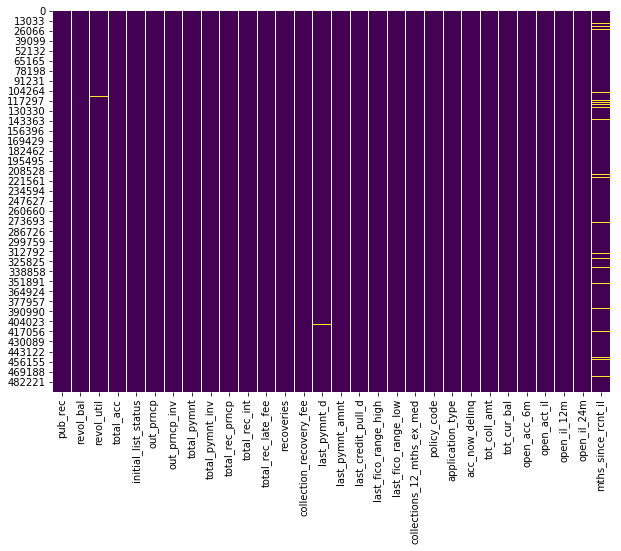

In [110]:
plt.figure(figsize=(10,7))
sns.heatmap(accepted_2018.iloc[:, 30:60].isnull(), cbar = False, cmap = "viridis")

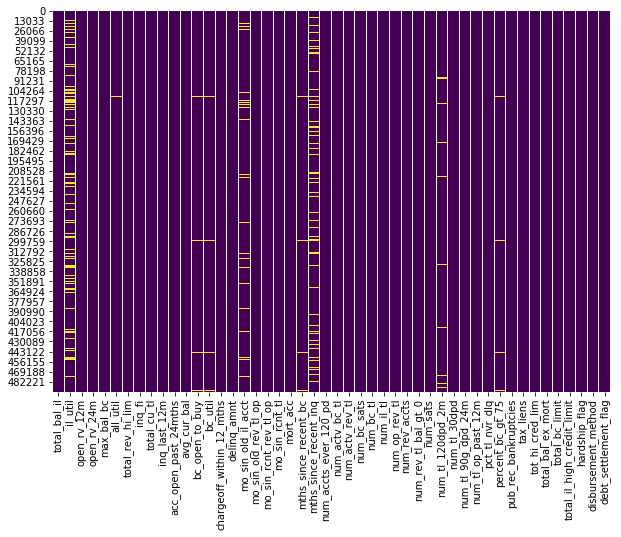

In [111]:
plt.figure(figsize=(10,7))
sns.heatmap(accepted_2018.iloc[:, 60:].isnull(), cbar = False, cmap = "viridis")

In [112]:
accepted["emp_title"].fillna("other").value_counts()

other                                       166971
Teacher                                      38824
Manager                                      34298
Owner                                        21977
Registered Nurse                             15867
Driver                                       14753
RN                                           14737
Supervisor                                   14297
Sales                                        13050
Project Manager                              10971
Office Manager                                9772
General Manager                               9251
Director                                      8934
owner                                         8507
President                                     7660
Engineer                                      7304
manager                                       7060
teacher                                       6692
Operations Manager                            6128
Vice President                 

In [113]:
accepted_2018["emp_length"].value_counts()

10+ years    160382
2 years       44747
< 1 year      43627
3 years       40629
1 year        33167
4 years       31262
5 years       30854
6 years       21977
7 years       17961
8 years       16027
9 years       12622
Name: emp_length, dtype: int64

In [114]:
accepted_2018["emp_length"].isna().sum()

41987

#### I am chosing to drop rows that do not have:
* Employment length,
* Ratio of total current balance to high credit/credit limit on all install acct
* Months since most recent inquiry
#### as there is no way to know where they belong 

In [115]:
accepted_2018.drop(accepted_2018[accepted_2018["emp_length"].isnull() == True].index, inplace = True)

In [116]:
accepted_2018.drop(accepted_2018[accepted_2018["il_util"].isnull() == True].index, inplace = True)

In [117]:
accepted_2018.drop(accepted_2018[accepted_2018["mths_since_recent_inq"].isnull() == True].index, inplace = True)

In [118]:
accepted_2018.shape

(345277, 108)

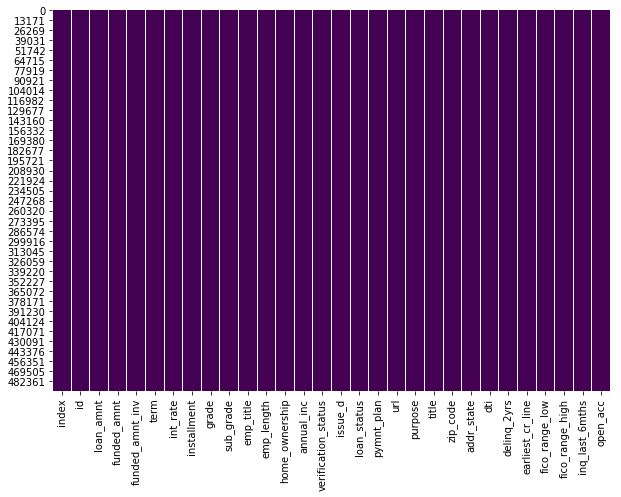

In [119]:
plt.figure(figsize=(10,7))
sns.heatmap(accepted_2018.iloc[:, :30].isnull(), cbar = False, cmap = "viridis")

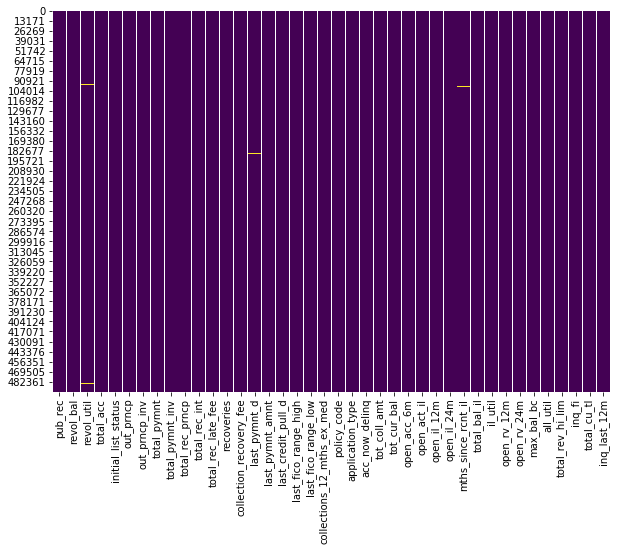

In [120]:
plt.figure(figsize=(10,7))
sns.heatmap(accepted_2018.iloc[:, 30:70].isnull(), cbar = False, cmap = "viridis")

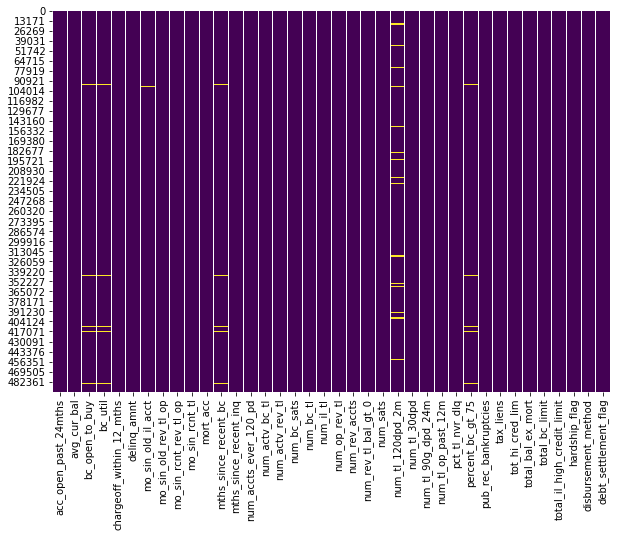

In [121]:
plt.figure(figsize=(10,7))
sns.heatmap(accepted_2018.iloc[:, 70:].isnull(), cbar = False, cmap = "viridis")

In [126]:
accepted_2018["dti"].

16.80     264
18.00     246
15.60     230
19.20     224
14.40     221
16.32     219
20.40     215
12.00     212
14.88     207
16.08     205
17.40     205
13.20     204
17.28     203
18.60     202
24.00     201
18.72     201
22.80     201
19.68     198
17.76     198
18.48     197
13.92     193
18.43     193
14.08     190
17.49     187
18.24     187
13.28     187
17.52     187
15.84     186
15.36     185
17.94     185
         ... 
95.44       1
90.55       1
76.59       1
83.91       1
102.28      1
77.31       1
97.67       1
110.53      1
110.47      1
156.00      1
96.28       1
66.03       1
490.90      1
83.61       1
76.41       1
79.78       1
59.15       1
83.19       1
91.06       1
234.99      1
96.30       1
96.20       1
68.66       1
59.56       1
174.16      1
115.82      1
56.02       1
68.18       1
52.20       1
103.46      1
Name: dti, Length: 8005, dtype: int64

In [127]:
accepted_2018[accepted_2018["dti"].isnull() == True]

,index,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
1411,1606258,130286432,32400.0,32400.0,32400.0,36 months,16.01,1139.25,C,C5,...,100.0,0.0,0.0,106845.0,71091.0,10400.0,72845.0,N,Cash,N
12245,1593259,131161534,6500.0,6500.0,6500.0,36 months,10.41,211.00,B,B3,...,50.0,0.0,0.0,47200.0,22250.0,10000.0,14600.0,N,Cash,N
24360,1586121,131525019,16000.0,16000.0,16000.0,60 months,16.01,389.18,C,C5,...,33.3,0.0,0.0,55518.0,36588.0,16300.0,30418.0,N,Cash,N
50067,829327,137749847,5000.0,5000.0,5000.0,36 months,14.47,172.04,C,C2,...,100.0,0.0,0.0,21061.0,18893.0,3300.0,16361.0,N,Cash,N
52042,832168,137856769,23000.0,23000.0,23000.0,60 months,24.37,666.62,E,E2,...,75.0,1.0,0.0,349720.0,89206.0,16000.0,76269.0,N,Cash,N
58186,823496,138074809,27000.0,27000.0,27000.0,60 months,11.55,594.48,B,B4,...,25.0,0.0,0.0,73052.0,46997.0,30600.0,40452.0,N,Cash,N
59942,822491,138132959,10000.0,10000.0,10000.0,36 months,10.47,324.89,B,B2,...,100.0,0.0,0.0,168439.0,135800.0,11100.0,93039.0,N,Cash,N
63968,804699,138282595,13300.0,13300.0,13300.0,36 months,14.47,457.61,C,C2,...,83.3,0.0,0.0,76252.0,33203.0,11000.0,52052.0,N,Cash,N
92256,1391692,144109619,10000.0,10000.0,10000.0,60 months,13.56,230.41,C,C1,...,0.0,0.0,0.0,23800.0,10837.0,12300.0,10000.0,N,Cash,N
98260,1387445,144477994,10000.0,10000.0,10000.0,36 months,18.94,366.26,D,D2,...,100.0,0.0,0.0,76448.0,65591.0,1500.0,74948.0,N,Cash,N


In [140]:
accepted_2018["bc_open_to_buy"].value_counts()

0.0         1944
2000.0       302
500.0        301
1000.0       280
3000.0       224
5000.0       220
2500.0       196
4000.0       195
3500.0       177
4500.0       165
1500.0       161
300.0        159
5500.0       141
6000.0       131
800.0        122
2300.0       113
8000.0       112
7000.0       109
6500.0       107
7500.0       105
10000.0       90
1800.0        86
2800.0        86
1300.0        85
3300.0        84
9000.0        84
3900.0        73
8500.0        73
700.0         73
3800.0        73
            ... 
87302.0        1
36696.0        1
56695.0        1
40422.0        1
43633.0        1
63495.0        1
43617.0        1
68104.0        1
23094.0        1
127001.0       1
43611.0        1
174445.0       1
43613.0        1
63499.0        1
43615.0        1
55096.0        1
22788.0        1
43618.0        1
77066.0        1
87238.0        1
150264.0       1
61563.0        1
36700.0        1
56705.0        1
81452.0        1
43625.0        1
43627.0        1
113407.0      

In [141]:
accepted_2018["bc_util"].value_counts()

0.0      6305
98.0      755
97.0      728
96.0      695
99.0      672
95.0      644
94.0      637
93.0      565
92.0      556
91.0      554
0.1       534
90.0      512
88.0      510
87.0      497
89.0      495
33.0      486
85.0      481
84.0      481
31.0      478
86.0      476
64.0      472
0.2       472
44.0      468
80.0      468
45.0      468
51.0      467
42.0      466
49.0      463
68.0      461
38.0      460
         ... 
194.0       1
114.1       1
129.3       1
112.4       1
123.6       1
132.1       1
113.0       1
111.6       1
131.7       1
110.4       1
108.8       1
111.9       1
113.4       1
117.5       1
107.2       1
112.7       1
145.0       1
108.1       1
104.7       1
106.6       1
123.5       1
106.8       1
104.2       1
109.1       1
108.5       1
113.2       1
138.2       1
116.9       1
175.0       1
119.0       1
Name: bc_util, Length: 1173, dtype: int64

In [137]:
accepted_2018[accepted_2018["bc_open_to_buy"].isnull() == True]

,index,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
43,1593269,129098805,21000.0,21000.0,21000.0,36 months,9.43,672.01,B,B1,Store manager,7 years,MORTGAGE,39200.0,Not Verified,Apr-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,132xx,NY,27.31,2.0,Apr-1984,725.0,729.0,0.0,8.0,0.0,384.0,3.7,24.0,w,15198.79,15198.79,7420.150000,7420.15,5801.21,1618.94,0.0,0.0,0.0,Mar-2019,672.01,Mar-2019,759.0,755.0,0.0,1.0,Individual,0.0,0.0,25067.0,0.0,2.0,0.0,0.0,31.0,5772.0,24.0,0.0,1.0,0.0,18.0,10400.0,0.0,0.0,0.0,1.0,3581.0,NaN,NaN,0.0,0.0,159.0,406.0,21.0,21.0,1.0,NaN,21.0,1.0,0.0,1.0,0.0,5.0,4.0,5.0,19.0,1.0,8.0,0.0,0.0,0.0,0.0,79.2,NaN,0.0,0.0,74570.0,6156.0,0.0,24170.0,N,Cash,N
98,1608534,129403725,5000.0,5000.0,5000.0,36 months,10.90,163.46,B,B4,Director,5 years,MORTGAGE,75000.0,Verified,Apr-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Other,208xx,MD,25.41,2.0,Apr-2003,685.0,689.0,0.0,7.0,0.0,1153.0,21.0,21.0,w,3640.91,3640.91,1795.030000,1795.03,1359.09,435.94,0.0,0.0,0.0,Mar-2019,163.46,Mar-2019,714.0,710.0,0.0,1.0,Individual,0.0,0.0,217750.0,0.0,5.0,1.0,3.0,11.0,61684.0,79.0,0.0,1.0,0.0,75.0,5500.0,1.0,1.0,3.0,5.0,31107.0,NaN,NaN,0.0,0.0,144.0,179.0,23.0,7.0,1.0,NaN,8.0,2.0,0.0,1.0,0.0,5.0,9.0,1.0,11.0,1.0,7.0,0.0,0.0,2.0,2.0,90.5,NaN,0.0,0.0,239641.0,62837.0,0.0,78141.0,N,Cash,N
401,1599073,129816223,30000.0,30000.0,30000.0,36 months,21.85,1143.39,D,D5,Teacher,10+ years,MORTGAGE,100000.0,Source Verified,Apr-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,928xx,CA,26.44,0.0,Dec-2000,675.0,679.0,0.0,11.0,1.0,851.0,15.5,20.0,f,22810.18,22810.18,12604.630000,12604.63,7189.82,5414.81,0.0,0.0,0.0,Mar-2019,1143.39,Mar-2019,719.0,715.0,0.0,1.0,Individual,0.0,0.0,107373.0,0.0,9.0,4.0,8.0,7.0,106522.0,91.0,0.0,0.0,0.0,88.0,5500.0,4.0,1.0,3.0,8.0,9761.0,NaN,NaN,0.0,0.0,127.0,207.0,25.0,7.0,1.0,NaN,8.0,0.0,0.0,1.0,0.0,2.0,13.0,2.0,6.0,1.0,11.0,0.0,0.0,0.0,4.0,100.0,NaN,1.0,0.0,121984.0,107373.0,0.0,116484.0,N,Cash,N
462,1607940,129853356,3100.0,3100.0,3100.0,36 months,10.41,100.63,B,B3,LABORER,3 years,MORTGAGE,24960.0,Source Verified,Apr-2018,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,856xx,AZ,31.25,0.0,Dec-2010,675.0,679.0,1.0,5.0,0.0,7822.0,61.1,7.0,w,2252.77,2252.77,1105.140000,1105.14,847.23,257.91,0.0,0.0,0.0,Mar-2019,100.63,Mar-2019,669.0,665.0,0.0,1.0,Joint App,0.0,0.0,184116.0,1.0,1.0,0.0,0.0,32.0,17290.0,77.0,2.0,2.0,0.0,71.0,12800.0,0.0,0.0,4.0,3.0,3682

In [148]:
accepted_2018["num_tl_120dpd_2m"].value_counts()

0.0    329935
Name: num_tl_120dpd_2m, dtype: int64

In [150]:
accepted["num_tl_120dpd_2m"].value_counts()

0.0    2105738
1.0       1219
2.0         46
3.0          5
7.0          1
6.0          1
4.0          1
Name: num_tl_120dpd_2m, dtype: int64

In [ ]:
num_tl_120dpd_2m

I am removing the rows of the dataset for dti, because:
* due to the amount of the available data, I believe that will not affect my outcome
* I checked the data of the rows consisting missing values in particular column to make sure there is no trend pointing towards possible bias after removing the rows
* no ideal way to fill them in
* constrains of equipment

In [136]:
accepted_2018.drop(accepted_2018[accepted_2018["dti"].isnull() == True].index, inplace = True)

Removing the rows of the dataset for bc_open_to_buy, bc_util, mths_since_recent_bc because:

* due to the amount of the available data, I believe that will not affect my outcome
* missing values in one of these columns corresponded with missing values for the other two
* I checked the data of the rows consisting missing values in particular column to make sure there is no trend pointing towards possible bias after removing the rows
* no ideal way to fill them in
* constrains of equipment

In [145]:
accepted_2018.drop(accepted_2018[accepted_2018["bc_open_to_buy"].isnull() == True].index, inplace = True)

In [174]:
accepted_2018.drop(accepted_2018[accepted_2018["mths_since_recent_bc"].isnull() == True].index, inplace = True)

Dropping num_tl_120dpd_2m column. All other values in the column are 0. So there is no variability, therefore it does not bring value to the model.

In [149]:
accepted_2018.drop("num_tl_120dpd_2m", axis = 1, inplace = True)

In [176]:
accepted_2018.iloc[:, 100:].isna().sum()

tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
hardship_flag                 0
disbursement_method           0
debt_settlement_flag          0
dtype: int64

In [177]:
accepted_2018["revol_util"].value_counts()

0.0      2617
38.0      627
32.0      621
37.0      600
51.0      597
43.0      594
48.0      592
34.0      586
39.0      584
45.0      580
36.0      576
28.0      575
41.0      575
49.0      572
44.0      572
33.0      572
25.0      571
46.0      570
47.0      564
35.0      560
26.0      557
42.0      556
59.0      555
52.0      555
30.0      551
27.0      550
57.0      546
36.1      542
61.0      542
56.0      541
         ... 
117.0       1
116.3       1
107.0       1
103.9       1
183.8       1
111.8       1
107.7       1
175.0       1
103.5       1
162.1       1
108.1       1
110.1       1
110.9       1
107.6       1
111.0       1
114.5       1
108.8       1
108.7       1
103.3       1
111.3       1
105.7       1
104.2       1
127.4       1
106.8       1
104.8       1
109.4       1
132.2       1
104.5       1
103.2       1
109.1       1
Name: revol_util, Length: 1098, dtype: int64

In [178]:
accepted_2018["last_pymnt_d"].value_counts()

Mar-2019    279182
Feb-2019     25034
Jan-2019      6256
Dec-2018      4919
Nov-2018      4658
Oct-2018      4449
Aug-2018      3558
Sep-2018      3444
Jul-2018      2704
Jun-2018      2240
May-2018      1685
Apr-2018      1142
Mar-2018       886
Feb-2018       507
Jan-2018       181
Name: last_pymnt_d, dtype: int64

In [179]:
accepted_2018["last_credit_pull_d"].value_counts()

Mar-2019    315612
Feb-2019      6054
Jan-2019      4923
Dec-2018      3185
Nov-2018      2718
Oct-2018      2256
Sep-2018      1598
Aug-2018      1363
Jul-2018      1310
May-2018       581
Apr-2018       441
Mar-2018       366
Jun-2018       280
Feb-2018       244
Jan-2018       212
Dec-2017        35
Apr-2019         1
Nov-2017         1
Name: last_credit_pull_d, dtype: int64

In [180]:
accepted_2018["mths_since_rcnt_il"].value_counts()

7.0      18181
4.0      17750
8.0      17121
3.0      16956
6.0      16893
5.0      16714
9.0      15626
2.0      15026
10.0     14983
13.0     14755
11.0     14271
12.0     13900
14.0     13597
15.0     11141
16.0      9864
17.0      8936
1.0       8645
18.0      8004
19.0      7377
20.0      6926
21.0      6240
22.0      5972
23.0      5770
24.0      4869
25.0      4044
26.0      3637
27.0      3291
28.0      3019
29.0      2780
30.0      2587
         ...  
423.0        1
388.0        1
268.0        1
276.0        1
310.0        1
197.0        1
274.0        1
193.0        1
228.0        1
379.0        1
272.0        1
300.0        1
240.0        1
226.0        1
227.0        1
220.0        1
283.0        1
338.0        1
287.0        1
284.0        1
229.0        1
289.0        1
305.0        1
225.0        1
320.0        1
299.0        1
301.0        1
256.0        1
208.0        1
255.0        1
Name: mths_since_rcnt_il, Length: 271, dtype: int64

In [181]:
accepted_2018["bc_util"].value_counts()

0.0      6304
98.0      755
97.0      728
96.0      695
99.0      672
95.0      644
94.0      637
93.0      565
92.0      556
91.0      554
0.1       534
90.0      512
88.0      510
87.0      497
89.0      495
33.0      486
85.0      481
84.0      481
31.0      478
86.0      476
64.0      472
0.2       472
44.0      468
80.0      468
45.0      468
51.0      467
42.0      466
49.0      463
68.0      461
38.0      460
         ... 
194.0       1
114.1       1
129.3       1
112.4       1
123.6       1
132.1       1
113.0       1
111.6       1
131.7       1
110.4       1
108.8       1
111.9       1
113.4       1
117.5       1
107.2       1
112.7       1
145.0       1
108.1       1
104.7       1
106.6       1
123.5       1
106.8       1
104.2       1
109.1       1
108.5       1
113.2       1
138.2       1
116.9       1
175.0       1
119.0       1
Name: bc_util, Length: 1173, dtype: int64

In [182]:
accepted_2018["mo_sin_old_il_acct"].value_counts()

130.0    3709
140.0    3668
134.0    3656
141.0    3630
131.0    3607
139.0    3604
133.0    3597
142.0    3594
132.0    3592
129.0    3575
143.0    3559
138.0    3554
144.0    3535
128.0    3533
137.0    3531
125.0    3485
135.0    3469
136.0    3439
145.0    3416
126.0    3399
146.0    3388
127.0    3371
124.0    3349
147.0    3333
148.0    3261
123.0    3249
122.0    3207
150.0    3167
149.0    3115
121.0    3108
         ... 
425.0       1
421.0       1
417.0       1
456.0       1
391.0       1
827.0       1
413.0       1
542.0       1
490.0       1
822.0       1
486.0       1
447.0       1
497.0       1
530.0       1
555.0       1
557.0       1
575.0       1
470.0       1
587.0       1
432.0       1
471.0       1
558.0       1
465.0       1
621.0       1
504.0       1
455.0       1
446.0       1
451.0       1
449.0       1
511.0       1
Name: mo_sin_old_il_acct, Length: 490, dtype: int64

In [183]:
accepted_2018["bc_util"].value_counts()

0.0      6304
98.0      755
97.0      728
96.0      695
99.0      672
95.0      644
94.0      637
93.0      565
92.0      556
91.0      554
0.1       534
90.0      512
88.0      510
87.0      497
89.0      495
33.0      486
85.0      481
84.0      481
31.0      478
86.0      476
64.0      472
0.2       472
44.0      468
80.0      468
45.0      468
51.0      467
42.0      466
49.0      463
68.0      461
38.0      460
         ... 
194.0       1
114.1       1
129.3       1
112.4       1
123.6       1
132.1       1
113.0       1
111.6       1
131.7       1
110.4       1
108.8       1
111.9       1
113.4       1
117.5       1
107.2       1
112.7       1
145.0       1
108.1       1
104.7       1
106.6       1
123.5       1
106.8       1
104.2       1
109.1       1
108.5       1
113.2       1
138.2       1
116.9       1
175.0       1
119.0       1
Name: bc_util, Length: 1173, dtype: int64

In [184]:
accepted_2018["percent_bc_gt_75"].value_counts()

0.0      131317
100.0     39568
50.0      29796
33.3      21471
25.0      15687
66.7      15130
20.0      11199
75.0       7876
16.7       7624
40.0       7581
60.0       5540
14.3       5118
80.0       4238
28.6       3625
12.5       3457
42.9       2602
11.1       2432
83.3       2308
57.1       1940
37.5       1754
22.2       1617
10.0       1540
71.4       1463
85.7       1227
9.1        1037
62.5        965
44.4        914
30.0        811
18.2        765
8.3         710
          ...  
63.0          1
52.4          1
2.8           1
7.4           1
14.7          1
6.5           1
57.7          1
19.2          1
52.2          1
25.8          1
65.4          1
47.6          1
25.9          1
78.9          1
29.2          1
94.7          1
12.9          1
37.9          1
36.0          1
18.5          1
22.6          1
2.9           1
52.6          1
17.9          1
27.6          1
41.4          1
94.4          1
61.9          1
91.3          1
77.3          1
Name: percent_bc_gt_75, 